# Packages

In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import random
import requests
import time
from bs4 import BeautifulSoup

# URL
+ [Wikipedia: List of countries and dependencies by population](https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population)

In [2]:
url = "https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population"

# Request & Response
+ [Requests: HTTP for Humans](https://docs.python-requests.org/en/latest/)
+ [Advanced Usage](https://docs.python-requests.org/en/master/user/advanced/)

In [3]:
s = requests.Session()
response = s.get(url, timeout=10)
response

<Response [200]>

# HTML Soup
+ [Beautiful Soup Documentation](https://www.crummy.com/software/BeautifulSoup/bs4/doc/)

In [4]:
soup = BeautifulSoup(response.content, 'html.parser')
pretty = soup.prettify()
soup.title.string

'List of countries and dependencies by population - Wikipedia'

# Table
+ Sovereign states and dependencies by population

In [5]:
table = soup.find('table', {"class": "wikitable sortable"})

# Columns

In [6]:
for row in table.findAll("tr"):
    columns = row.findAll("td")
len(columns)

7

# Rows

In [7]:
rows = table.findAll("tr")
len(rows)

243

# Table Header

In [8]:
header = [th.text.rstrip() for th in rows[0].find_all("th")][1:]
for title in header:
    print(f"{header.index(title) + 1}/{len(header)} {title}")

1/7 Country / Dependency
2/7 Region
3/7 Population
4/7 Percentage of the world
5/7 Date
6/7 Source (official or from the United Nations)
7/7 Notes


# Data Analysis

In [9]:
data_list = []
for row in rows[2:]:
    data = [d.text.rstrip() for d in row.select("td")]
    data_list.append(data)
data_list = pd.DataFrame(data_list, columns=header)
df = data_list.copy()
df.columns = ["Country", "Region", "Population", "% of World", "Date", "Source", "Notes"]
df.drop(df.iloc[:, 4:7], axis=1)

,Country,Region,Population,% of World
0,China,Asia,"1,412,600,000",17.8%
1,India,Asia,"1,375,258,100",17.3%
2,United States,Americas,"332,620,545",4.19%
3,Indonesia,Asia[b],"272,248,500",3.43%
4,Pakistan,Asia,"225,199,937",2.84%
...,...,...,...,...
236,Niue (New Zealand),Oceania,"1,549",0%
237,Tokelau (New Zealand),Oceania,"1,501",0%
238,Vatican City,Europe,825,0%
239,Cocos (Keeling) Islands (Australia),Oceania,573,0%


# Float numbers

In [10]:
df["Population"] = df["Population"].apply(lambda x: float(x.split()[0].replace(',', '')))

# Top 10

In [11]:
df['Population'] = df['Population'].astype(int)
top10 = df.sort_values("Population",ascending=False).head(10)
top10.drop(df.iloc[:, 4:7], axis=1)

,Country,Region,Population,% of World
0,China,Asia,1412600000,17.8%
1,India,Asia,1375258100,17.3%
2,United States,Americas,332620545,4.19%
3,Indonesia,Asia[b],272248500,3.43%
4,Pakistan,Asia,225199937,2.84%
5,Brazil,Americas,214505532,2.70%
6,Nigeria,Africa,211400708,2.66%
7,Bangladesh,Asia,172546412,2.17%
8,Russia,Europe[b],145478097,1.83%
9,Mexico,Americas,127996051,1.61%


# Data Plot

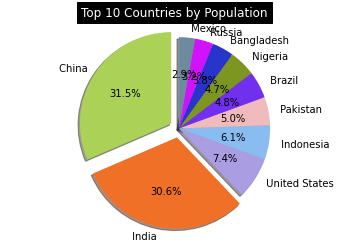

In [12]:
labels = top10['Country']
sizes = top10['Population']
colors = []
for hexadecimal in range(10):
    colors = colors + ["#"+''.join([random.choice('ABCDEF0123456789') for i in range(6)])]
autopct = top10 ['% of World']
explode = (0.1, 0.1, 0, 0, 0, 0, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Top 10 Countries by Population", color='white', backgroundcolor='black')
plt.show()